## Librerias

In [1]:
import pandas as pd
import numpy as np
import os
import textwrap
import matplotlib.pyplot as plt
import seaborn as sns


pd.options.display.float_format = '{:,.2f}'.format

import re

In [2]:
!pip install pyjanitor

In [ ]:
#!pip install skimpy

In [ ]:
#!pip install -U dataprep

## Carga de datos

In [3]:
import janitor

# Esto limpia los nombres de las columnas
df = pd.read_excel('../data/base.xlsx').clean_names() #.remove_empty()
df.head(3)

,descripcion,ubicacion,precio_uf,precio_pesos,construido,dormitorio,banio,coordenadas,superficie_total,superficie_util,cantidad_pisos_edificio,departamentos_por_piso,piso_departamento,orientacion,antiguedad,gastos_comunes,estacionamiento,bodega
0,No deje de visitar... gran departamento u ofic...,"Av. Providencia 1200 - 1500, Providencia, Chil...",183000000pesos,NaN,103m² totales,4,2.00,"-33.4281852,-70.618222",103 m²,103 m²,6.00,4.00,6.00,N,50 años,45000 CLP,NaN,NaN
1,Excelente departamento en Av. El Llano Suberca...,"Llano Subercaseaux, San Miguel, Chile, El Llan...",5290,"159,603,664.00",90m² totales,2,2.00,"-33.4851468,-70.6504044",90 m²,80 m²,21.00,4.00,19.00,S,10 años,90000 CLP,1.00,1.00
2,Este exquisito departamento está prácticamente...,"Estoril 750, Las Condes, Chile, Estoril, Las C...",17300,"521,955,273.00",238m² totales,3,2.00,"-33.3878283,-70.528925",238 m²,178 m²,1.00,4.00,1.00,S,2 años,350000 CLP,2.00,1.00


In [ ]:
#Para resumenes express de la base de datos

#from skimpy import skim

#skim(df[0:100])


#from dataprep.eda import create_report

# create_report(train[1:10]) # Este proceso es lento

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   descripcion              1548 non-null   object 
 1   ubicacion                1543 non-null   object 
 2   precio_uf                1548 non-null   object 
 3   precio_pesos             1267 non-null   float64
 4   construido               1548 non-null   object 
 5   dormitorio               1548 non-null   object 
 6   banio                    1540 non-null   float64
 7   coordenadas              1548 non-null   object 
 8   superficie_total         1544 non-null   object 
 9   superficie_util          1546 non-null   object 
 10  cantidad_pisos_edificio  1060 non-null   float64
 11  departamentos_por_piso   833 non-null    float64
 12  piso_departamento        1086 non-null   float64
 13  orientacion              921 non-null    object 
 14  antiguedad              

In [5]:
''' Esta funcion es una utilitaria para imprimir los nombres de columnas y 
que no toque hacer desplazamiento horizontal'''
wrapper = textwrap.TextWrapper(width=100)

In [6]:
# list( train.select_dtypes( include= 'integer') )  # Comando base
print( 'Columnas Object' )
print( wrapper.fill( str( list( df.select_dtypes( include= 'object') ) ) ) )
print( 'Columnas Entero' )
print( wrapper.fill( str( list( df.select_dtypes( include= 'integer') ) ) ) )
print( 'Columnas Float' )
print( wrapper.fill( str( list( df.select_dtypes( include= 'floating') ) ) ) )
print( 'Columnas Verdadero Falso' )
print( wrapper.fill( str( list( df.select_dtypes( include= 'bool') ) ) ) )
print( 'Columnas Categoricas' )
print( wrapper.fill( str( list( df.select_dtypes( include= 'category') ) ) ) )
print( 'Columnas Fecha' )
print( wrapper.fill( str( list( df.select_dtypes( include= 'datetime') ) ) ) )
     

Columnas Object
['descripcion', 'ubicacion', 'precio_uf', 'construido', 'dormitorio', 'coordenadas',
'superficie_total', 'superficie_util', 'orientacion', 'antiguedad', 'gastos_comunes']
Columnas Entero
[]
Columnas Float
['precio_pesos', 'banio', 'cantidad_pisos_edificio', 'departamentos_por_piso', 'piso_departamento',
'estacionamiento', 'bodega']
Columnas Verdadero Falso
[]
Columnas Categoricas
[]
Columnas Fecha
[]


In [7]:
# Columnas object
cols_obj= ['descripcion', 'ubicacion', 'precio_uf', 'construido', 'dormitorio', 'coordenadas',
'superficie_total', 'superficie_util', 'orientacion', 'antiguedad', 'gastos_comunes']

# Columnas categoricas
cols_cat= []

# Columnas enteras
cols_int= []

# Columnas float
cols_float= ['precio_pesos', 'banio', 'cantidad_pisos_edificio', 'departamentos_por_piso', 'piso_departamento',
'estacionamiento', 'bodega']

In [8]:
# cambiamos la columna de object a str para separar las columnas tipo 234UF

for col in df.columns:
  if col in cols_obj:
    df[col] = df[col].astype(str)

## Limpieza de la base de datos

La columna $precio\_uf$ es de tipo object y tiene observaciones del tipo "183000000pesos", como observaciones del tipo "5290".

Se utiliza este input como la variable a predecir, ya que no cuenta con variables perdidas, como ocurre con la varibale $precio\_pesos$

In [9]:
# Definimos una función para obtener el valor numérico de una cadena de texto en formato '123pesos'

def obtener_valor_numerico(cadena):
    numeros = re.findall('\d+', cadena)
    if numeros:
        return int(numeros[0])
    else:
        return None


<>:4: DeprecationWarning: invalid escape sequence \d
<>:4: DeprecationWarning: invalid escape sequence \d
C:\Users\DELL\AppData\Local\Temp\ipykernel_34988\3794889347.py:4: DeprecationWarning: invalid escape sequence \d
  numeros = re.findall('\d+', cadena)


In [10]:
# se convierte a str para poder aplicar algunos métodos de str
#df['precio_uf'] = df['precio_uf'].astype(str) 

# Aplicamos la función a la columna 'Precio_uf' del DataFrame
df['precio_en_pesos'] = df['precio_uf'].apply(obtener_valor_numerico)

# Multiplicamos por 35000 los valores que son numéricos, que no tienen la estructura '1234pesos'
df.loc[df['precio_en_pesos'].notnull() & (df['precio_uf'].str.contains('pesos')==False), 'precio_en_pesos'] *= 35000

df['precio_en_pesos'] = df['precio_en_pesos'].astype(float)
df['precio_en_uf'] = round(df['precio_en_pesos']/35000, 2) # se define el precio en uf
df = df.drop(columns=['precio_uf', 'precio_pesos'], axis=1)

In [11]:
df.head(3)

,descripcion,ubicacion,construido,dormitorio,banio,coordenadas,superficie_total,superficie_util,cantidad_pisos_edificio,departamentos_por_piso,piso_departamento,orientacion,antiguedad,gastos_comunes,estacionamiento,bodega,precio_en_pesos,precio_en_uf
0,No deje de visitar... gran departamento u ofic...,"Av. Providencia 1200 - 1500, Providencia, Chil...",103m² totales,4,2.00,"-33.4281852,-70.618222",103 m²,103 m²,6.00,4.00,6.00,N,50 años,45000 CLP,NaN,NaN,"183,000,000.00","5,228.57"
1,Excelente departamento en Av. El Llano Suberca...,"Llano Subercaseaux, San Miguel, Chile, El Llan...",90m² totales,2,2.00,"-33.4851468,-70.6504044",90 m²,80 m²,21.00,4.00,19.00,S,10 años,90000 CLP,1.00,1.00,"185,150,000.00","5,290.00"
2,Este exquisito departamento está prácticamente...,"Estoril 750, Las Condes, Chile, Estoril, Las C...",238m² totales,3,2.00,"-33.3878283,-70.528925",238 m²,178 m²,1.00,4.00,1.00,S,2 años,350000 CLP,2.00,1.00,"605,500,000.00","17,300.00"


algunas features como "construido" tienen observaciones en este formato "103m² totales", junto con otras variables más, la s que serán tratadas a continuación 

In [12]:
#df['precio_uf_nuevo'] = df['precio_uf'].str.extract('(\d+)').astype(int)

# En primer lugar aquellas columnas que tienen el valor numerico junto a la palabra ej: 185pesos
# Definimos la expresión regular para extraer la cantidad numérica
regex = r'(\d+)'

# Aplicamos la expresión regular a la columna "precio_uf"

#df['dormitorio'] = df['dormitorio'].astype(str) 

#df['precio_uf_nuevo'] = df['precio_uf'].apply(lambda x: float(re.findall(regex, x)[0]))
df['construido_nuevo'] = df['construido'].apply(lambda x: float(re.findall(regex, x)[0]))
df['dormitorio_nuevo'] = df['dormitorio'].apply(lambda x: float(re.findall(regex, x)[0]))



# Ahora, para las columnas donde los valores estan separados por un espacio, se procede como:

# Dividimos la columna en dos partes separadas por el espacio en blanco
df[['superficie_total_nuevo', 'unidad1']] = df['superficie_total'].str.split(' ', n=1, expand=True)
# Convertimos la parte numérica en un valor numérico
df['superficie_total_nuevo'] = df['superficie_total_nuevo'].astype(float)


# Dividimos la columna en dos partes separadas por el espacio en blanco
df[['superficie_util_nuevo', 'unidad2']] = df['superficie_util'].str.split(' ', n=1, expand=True)
# Convertimos la parte numérica en un valor numérico
df['superficie_util_nuevo'] = df['superficie_util_nuevo'].astype(float)

# Dividimos la columna en dos partes separadas por el espacio en blanco
df[['antiguedad_nuevo', 'unidad3']] = df['antiguedad'].str.split(' ', n=1, expand=True)
# Convertimos la parte numérica en un valor numérico
df['antiguedad_nuevo'] = df['antiguedad_nuevo'].astype(float)

# Dividimos la columna en dos partes separadas por el espacio en blanco
df[['gastos_comunes_nuevo', 'unidad4']] = df['gastos_comunes'].str.split(' ', n=1, expand=True)
# Convertimos la parte numérica en un valor numérico
df['gastos_comunes_nuevo'] = df['gastos_comunes_nuevo'].astype(float)


#df['dormitorio'] = df['dormitorio'].astype(int)
#df['banio'] = df['banio'].astype(int)

df = df.drop(['dormitorio','construido', 'superficie_total', 'superficie_util', 'antiguedad', 'gastos_comunes',
             'unidad1', 'unidad2', 'unidad3', 'unidad4'], axis=1)

df.head(2)

,descripcion,ubicacion,banio,coordenadas,cantidad_pisos_edificio,departamentos_por_piso,piso_departamento,orientacion,estacionamiento,bodega,precio_en_pesos,precio_en_uf,construido_nuevo,dormitorio_nuevo,superficie_total_nuevo,superficie_util_nuevo,antiguedad_nuevo,gastos_comunes_nuevo
0,No deje de visitar... gran departamento u ofic...,"Av. Providencia 1200 - 1500, Providencia, Chil...",2.00,"-33.4281852,-70.618222",6.00,4.00,6.00,N,NaN,NaN,"183,000,000.00","5,228.57",103.00,4.00,103.00,103.00,50.00,"45,000.00"
1,Excelente departamento en Av. El Llano Suberca...,"Llano Subercaseaux, San Miguel, Chile, El Llan...",2.00,"-33.4851468,-70.6504044",21.00,4.00,19.00,S,1.00,1.00,"185,150,000.00","5,290.00",90.00,2.00,90.00,80.00,10.00,"90,000.00"


Las variable $coordenadas$, se procede a crear 2 nuevas variables de latitud y longitud para una mejor compresión.

In [13]:
df[['latitud', 'longitud']] = df['coordenadas'].str.split(',', expand=True)
df['latitud'] = df['latitud'].astype(float)
df['longitud'] = df['longitud'].astype(float)

df = df.drop(['coordenadas'], axis=1)

In [14]:
df.shape

(1548, 19)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   descripcion              1548 non-null   object 
 1   ubicacion                1548 non-null   object 
 2   banio                    1540 non-null   float64
 3   cantidad_pisos_edificio  1060 non-null   float64
 4   departamentos_por_piso   833 non-null    float64
 5   piso_departamento        1086 non-null   float64
 6   orientacion              1548 non-null   object 
 7   estacionamiento          1039 non-null   float64
 8   bodega                   973 non-null    float64
 9   precio_en_pesos          1548 non-null   float64
 10  precio_en_uf             1548 non-null   float64
 11  construido_nuevo         1548 non-null   float64
 12  dormitorio_nuevo         1548 non-null   float64
 13  superficie_total_nuevo   1544 non-null   float64
 14  superficie_util_nuevo   

## EDA

### 1°. Graficar la variable a predecir $precio\_en\_uf$ su distribución se presenta como: 

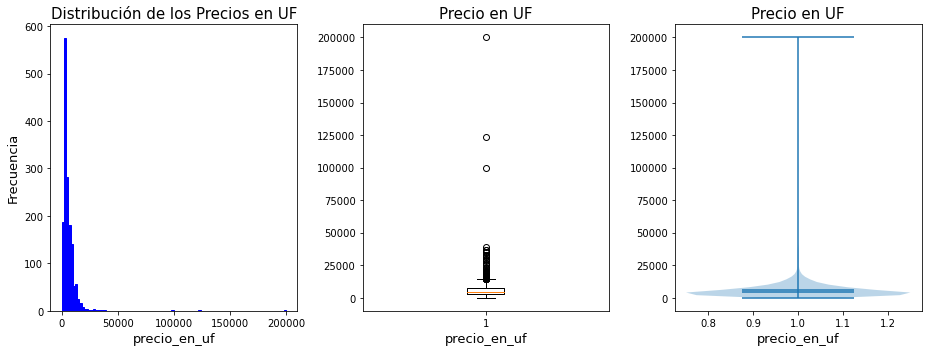

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13,5))

ax1.hist(df['precio_en_uf'], bins=100, color = "blue", ec="blue", histtype="bar")
ax1.set_xlabel("precio_en_uf", fontsize = 13)
ax1.set_ylabel("Frecuencia", fontsize = 13)
ax1.set_title(r"Distribución de los Precios en UF", fontsize=15)

ax2.boxplot(df['precio_en_uf'])
ax2.set_xlabel("precio_en_uf", fontsize = 13)
ax2.set_ylabel("", fontsize = 13)
ax2.set_title(r"Precio en UF", fontsize=15)

ax3.violinplot(df['precio_en_uf'], showmeans = True, showmedians = True)
ax3.set_xlabel("precio_en_uf", fontsize = 13)
ax3.set_ylabel("", fontsize = 13)
ax3.set_title(r"Precio en UF", fontsize=15)
plt.tight_layout()

Hay presencia de asimetría en el el precio en uf, con valores atípicos. 

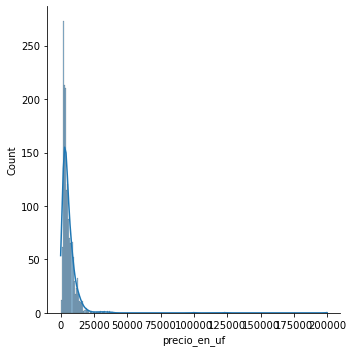

In [17]:
sns.displot(x=df['precio_en_uf'],kind=("hist"), kde=True)

<AxesSubplot:xlabel='precio_en_uf'>

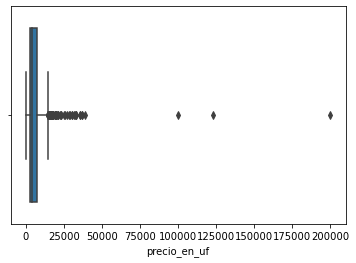

In [18]:
sns.boxplot(x=df["precio_en_uf"])

In [19]:
df['precio_en_uf'].describe()

count     1,548.00
mean      5,879.64
std       7,772.07
min           0.29
25%       2,590.75
50%       4,100.00
75%       7,300.00
max     200,000.00
Name: precio_en_uf, dtype: float64

Hay presencia de valores extremos de gran relevancia en el conjunto de datos. Más adelante, al momento de aplicar un modelo de regresión, se detallará la opcion para tratar los valores extremos en la variable a predecir.

### 2°. Analisis de variables catergóricas 

<AxesSubplot:xlabel='precio_en_uf', ylabel='orientacion'>

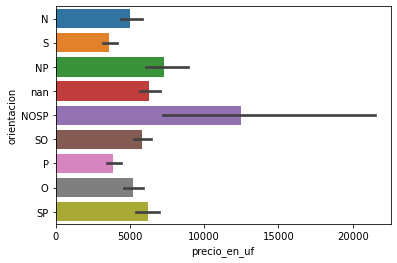

In [20]:
sns.barplot(data=df, x="precio_en_uf", y="orientacion")

<AxesSubplot:xlabel='precio_en_uf', ylabel='orientacion'>

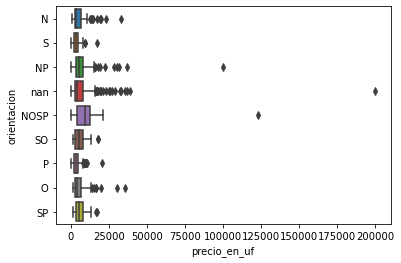

In [21]:
sns.boxplot(data=df, x="precio_en_uf", y="orientacion")

Se observa la presencia de una categoria llamanda $nan$. Se procede a realizar un tratamiento para una mejor comprensión de la variable, que tiene 0 observaciones perdidas, como se presenta a continuación 

In [22]:
df['orientacion'].isnull().sum()

0

Se realiza en tratamiento para asignar correctamente a los valores perdidos.

In [23]:
# Asignamos NaN a las observaciones donde orientacion es 'nan'
df.loc[df['orientacion'] == 'nan', 'orientacion'] = np.nan

In [24]:
#df[df['orientacion'] == 'nan']
df['orientacion'].isnull().sum()

627

In [25]:
#df['orientacion'].value_counts(dropna=False)
nombre = 'orientacion' 
print(nombre)
print("UNICOS: "+ str(df[nombre].nunique()))
print(df[nombre].value_counts(dropna=False))
print("-----")

orientacion
UNICOS: 8
NaN     627
O       182
NP      155
N       142
SO      121
P       115
S        92
SP       85
NOSP     29
Name: orientacion, dtype: int64
-----


### 3°. Analisis de variables numéricas

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   descripcion              1548 non-null   object 
 1   ubicacion                1548 non-null   object 
 2   banio                    1540 non-null   float64
 3   cantidad_pisos_edificio  1060 non-null   float64
 4   departamentos_por_piso   833 non-null    float64
 5   piso_departamento        1086 non-null   float64
 6   orientacion              921 non-null    object 
 7   estacionamiento          1039 non-null   float64
 8   bodega                   973 non-null    float64
 9   precio_en_pesos          1548 non-null   float64
 10  precio_en_uf             1548 non-null   float64
 11  construido_nuevo         1548 non-null   float64
 12  dormitorio_nuevo         1548 non-null   float64
 13  superficie_total_nuevo   1544 non-null   float64
 14  superficie_util_nuevo   

### Columnas integer

In [27]:
columnas_integer = ['dormitorio_nuevo', 'bodega', 'estacionamiento', 'banio']

In [28]:
for col in columnas_integer:
    #if df[col].dtypes == "float64":
    print("-----")
    print(col)
    print("UNICOS: "+ str(df[col].nunique()))
    print(df[col].value_counts(dropna=False))
    print("-----")

-----
dormitorio_nuevo
UNICOS: 7
2.00    597
3.00    456
1.00    351
4.00    131
5.00     10
6.00      2
8.00      1
Name: dormitorio_nuevo, dtype: int64
-----
-----
bodega
UNICOS: 3
1.00    944
NaN     575
2.00     27
3.00      2
Name: bodega, dtype: int64
-----
-----
estacionamiento
UNICOS: 5
1.00    781
NaN     509
2.00    217
3.00     30
4.00      9
5.00      2
Name: estacionamiento, dtype: int64
-----
-----
banio
UNICOS: 6
2.00    689
1.00    615
3.00    171
4.00     52
5.00     12
NaN       8
6.00      1
Name: banio, dtype: int64
-----


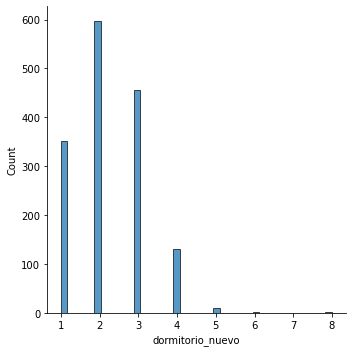

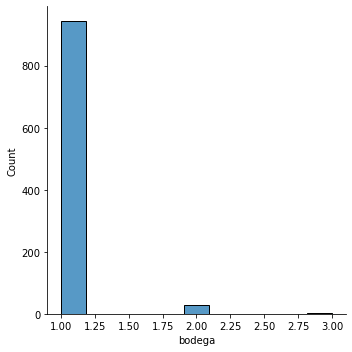

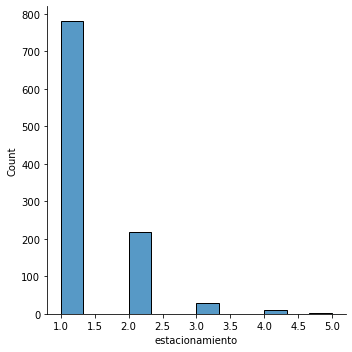

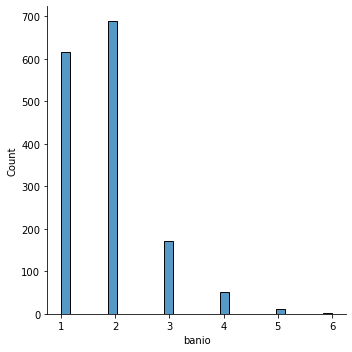

In [29]:
#df[df['banio']=='1banio'] 
#sns.barplot(data=df, x="banio", y="precio_en_uf")

for col in columnas_integer:
    sns.displot(x=df[col],kind=("hist"))#, kde=True)
    #sns.barplot(x=df[col])
    
    

### columnas float

In [30]:
columnas_float = ['cantidad_pisos_edificio', 'departamentos_por_piso',
       'piso_departamento', 'precio_en_pesos', 'construido_nuevo',
       'superficie_total_nuevo', 'superficie_util_nuevo', 'antiguedad_nuevo',
       'gastos_comunes_nuevo', 'latitud', 'longitud', #'precio_en_uf'
                 ]


### variable superficie_total_nuevo

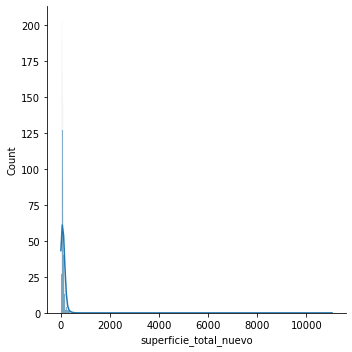

In [31]:
sns.displot(x=df['superficie_total_nuevo'],kind=("hist"), kde=True)

<AxesSubplot:xlabel='superficie_total_nuevo'>

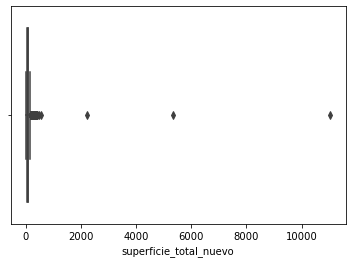

In [32]:
sns.boxplot(x=df["superficie_total_nuevo"])

In [33]:
df['superficie_total_nuevo'].describe()

count    1,544.00
mean        91.92
std        318.70
min          1.00
25%         45.00
50%         65.00
75%         94.00
max     11,040.00
Name: superficie_total_nuevo, dtype: float64

El boxplot, muestra la presencia de valores atípicos. Por otro lado, la superficie minima de una de las propiedades es de $1m^2$ y corresponde a la siguiente propiedad. 

In [34]:
df[df['superficie_total_nuevo'] == df['superficie_total_nuevo'].min()]

,descripcion,ubicacion,banio,cantidad_pisos_edificio,departamentos_por_piso,piso_departamento,orientacion,estacionamiento,bodega,precio_en_pesos,precio_en_uf,construido_nuevo,dormitorio_nuevo,superficie_total_nuevo,superficie_util_nuevo,antiguedad_nuevo,gastos_comunes_nuevo,latitud,longitud
327,Lindo Departamento ubicado en Las Condes3 Dorm...,"Av. Apoquindo 7850, Las Condes, Chile, Los Dom...",2.00,NaN,NaN,18.00,NaN,1.00,1.00,"245,000,000.00","7,000.00",1.00,3.00,1.00,1.00,NaN,1.00,-33.41,-70.55


La propiedad que dice ser un departamento, cuenta con 2 baños, 1 baño y 1 bodega, donde la superficie total de la propiedad es $1m^2$. Esta información no es recomendable que ingrese al futuro modelo. Respecto a la propiedad de superficie total máxima, esta es:    

In [35]:
df[df['superficie_total_nuevo'] == df['superficie_total_nuevo'].max()]

,descripcion,ubicacion,banio,cantidad_pisos_edificio,departamentos_por_piso,piso_departamento,orientacion,estacionamiento,bodega,precio_en_pesos,precio_en_uf,construido_nuevo,dormitorio_nuevo,superficie_total_nuevo,superficie_util_nuevo,antiguedad_nuevo,gastos_comunes_nuevo,latitud,longitud
822,Precioso departamento en muy buenas condicione...,"El Aromo 7200 - 7500, Vitacura, Región Metropo...",3.00,8.00,NaN,6.00,NaN,2.00,1.00,"350,000,000.00","10,000.00","11,040.00",4.00,"11,040.00","9,820.00",19.00,"200,000.00",-33.39,-70.56


Esta variable cuenta con la siguiente información de datos perdidos.

In [36]:
print('numero de valores perdidos: ',df['superficie_total_nuevo'].isnull().sum())
print('porcentaje de valores perdidos: ',round((df['superficie_total_nuevo'].isnull().sum() / len(df))*100,2),'%' )

numero de valores perdidos:  4
porcentaje de valores perdidos:  0.26 %


### variable antiguedad

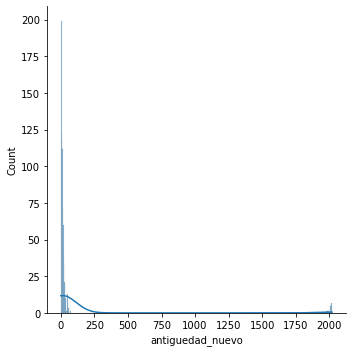

In [37]:
sns.displot(x=df['antiguedad_nuevo'],kind=("hist"), kde=True)

<AxesSubplot:xlabel='antiguedad_nuevo'>

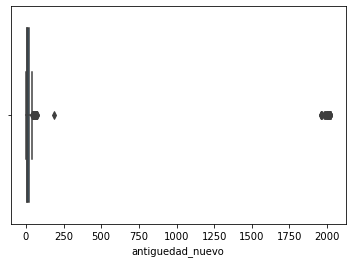

In [38]:
sns.boxplot(x=df["antiguedad_nuevo"])

In [39]:
df['antiguedad_nuevo'].describe()

count   1,041.00
mean       96.37
std       396.61
min         0.00
25%         5.00
50%        10.00
75%        20.00
max     2,021.00
Name: antiguedad_nuevo, dtype: float64

Se observa que existen observaciones que son presentadas como años de antiguiedad, mientras que en otros casos, se presenta el año de construcción, como ocurre con el valor maximo de las observaciones que presente el valor 2021. Se procede a indentificar estas observaciones y se creará una nueva variable que presente la información en un mismo formato   

In [40]:
print('numero de valores perdidos: ',df['antiguedad_nuevo'].isnull().sum())
print('porcentaje de valores perdidos: ',round((df['antiguedad_nuevo'].isnull().sum() / len(df))*100,2),'%' )

numero de valores perdidos:  507
porcentaje de valores perdidos:  32.75 %


### variable gastos_comunes_nuevo

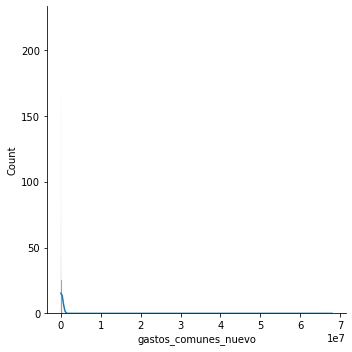

In [41]:
sns.displot(x=df['gastos_comunes_nuevo'],kind=("hist"), kde=True)

<AxesSubplot:xlabel='gastos_comunes_nuevo'>

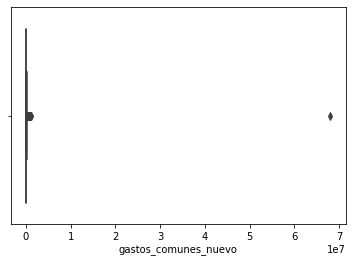

In [42]:
sns.boxplot(x=df["gastos_comunes_nuevo"])

In [43]:
df['gastos_comunes_nuevo'].describe()

count        1,379.00
mean       152,799.76
std      1,831,304.29
min              0.00
25%         50,000.00
50%         75,000.00
75%        120,000.00
max     68,000,000.00
Name: gastos_comunes_nuevo, dtype: float64

In [44]:
df['gastos_comunes_nuevo'].sort_values(ascending=True)

447    0.00
754    0.00
416    0.00
422    0.00
1179   0.00
       ... 
1494    NaN
1495    NaN
1496    NaN
1525    NaN
1530    NaN
Name: gastos_comunes_nuevo, Length: 1548, dtype: float64

In [45]:
len(df[df['gastos_comunes_nuevo'] == 0])

36

Existen 36 propiedades que presentan valor 0 en los gastos comunes 

In [46]:
df['gastos_comunes_nuevo'].sort_values(ascending=False)

549    68,000,000.00
1009    1,200,000.00
752     1,200,000.00
259     1,000,000.00
175     1,000,000.00
            ...     
1494             NaN
1495             NaN
1496             NaN
1525             NaN
1530             NaN
Name: gastos_comunes_nuevo, Length: 1548, dtype: float64

Hay una propiedad que tiene un valor de gastos comunes elevado, respecto al resto de las observaciones. El precio maximo de gastos comunes corresponde a la propiedad de id 549, que tiene las siguientes caracteristicas.

In [47]:
df[df['gastos_comunes_nuevo'] == 68000000.00]

,descripcion,ubicacion,banio,cantidad_pisos_edificio,departamentos_por_piso,piso_departamento,orientacion,estacionamiento,bodega,precio_en_pesos,precio_en_uf,construido_nuevo,dormitorio_nuevo,superficie_total_nuevo,superficie_util_nuevo,antiguedad_nuevo,gastos_comunes_nuevo,latitud,longitud
549,AGENTE INMOBILIARIO CKR CRISTIAN COFRE +569938...,"Santo Domingo 748, Santiago, Chile, Centro His...",1.00,NaN,NaN,NaN,NaN,NaN,NaN,"79,310,000.00","2,266.00",35.00,1.00,35.00,35.00,NaN,"68,000,000.00",-33.44,-70.65


In [48]:
print('numero de valores perdidos: ',df['gastos_comunes_nuevo'].isnull().sum())
print('porcentaje de valores perdidos: ',round((df['gastos_comunes_nuevo'].isnull().sum() / len(df))*100,2),'%' )

numero de valores perdidos:  169
porcentaje de valores perdidos:  10.92 %


La propiedad que tiene gastos comunes de 68.000.000, es una propiedad de 35 $m^2$, y un precio en uf de 2.266. 
Por la ubicación de la propiedad, lo mas probable es que tal cifra no sea la correcta. Se decide eliminar esta observación. 

In [49]:
df.drop(df.index[[549]], inplace=True)

In [50]:
df[df['gastos_comunes_nuevo'] == 68000000.00]

,descripcion,ubicacion,banio,cantidad_pisos_edificio,departamentos_por_piso,piso_departamento,orientacion,estacionamiento,bodega,precio_en_pesos,precio_en_uf,construido_nuevo,dormitorio_nuevo,superficie_total_nuevo,superficie_util_nuevo,antiguedad_nuevo,gastos_comunes_nuevo,latitud,longitud


## Observando que no existan valores donde `superficie_total_nuevo` < `construido_nuevo`

In [51]:
df.head(2)

,descripcion,ubicacion,banio,cantidad_pisos_edificio,departamentos_por_piso,piso_departamento,orientacion,estacionamiento,bodega,precio_en_pesos,precio_en_uf,construido_nuevo,dormitorio_nuevo,superficie_total_nuevo,superficie_util_nuevo,antiguedad_nuevo,gastos_comunes_nuevo,latitud,longitud
0,No deje de visitar... gran departamento u ofic...,"Av. Providencia 1200 - 1500, Providencia, Chil...",2.00,6.00,4.00,6.00,N,NaN,NaN,"183,000,000.00","5,228.57",103.00,4.00,103.00,103.00,50.00,"45,000.00",-33.43,-70.62
1,Excelente departamento en Av. El Llano Suberca...,"Llano Subercaseaux, San Miguel, Chile, El Llan...",2.00,21.00,4.00,19.00,S,1.00,1.00,"185,150,000.00","5,290.00",90.00,2.00,90.00,80.00,10.00,"90,000.00",-33.49,-70.65


In [52]:
# Identificar las observaciones donde superficie_total_nuevo es menos que construido_nuevo
superficies_incorrectas = df['superficie_total_nuevo'] < df['construido_nuevo']
datos_incorrectos = df[superficies_incorrectas]
datos_incorrectos

,descripcion,ubicacion,banio,cantidad_pisos_edificio,departamentos_por_piso,piso_departamento,orientacion,estacionamiento,bodega,precio_en_pesos,precio_en_uf,construido_nuevo,dormitorio_nuevo,superficie_total_nuevo,superficie_util_nuevo,antiguedad_nuevo,gastos_comunes_nuevo,latitud,longitud


### Se crea una nueva variable `anio_construccion` tomando como referencia la variable `antiguedad_nuevo` que presenta la siguente información.

In [53]:
#for valor in df.antiguedad_nuevo:
#    #print(valor)
#    if valor is not None and valor < 1500:
#        df['anio_construccion'] = 2023 - df['antiguedad_nuevo']
#    else:
#        df['anio_construccion'] = df['antiguedad_nuevo']

In [54]:
df['antiguedad_nuevo'].describe()

count   1,041.00
mean       96.37
std       396.61
min         0.00
25%         5.00
50%        10.00
75%        20.00
max     2,021.00
Name: antiguedad_nuevo, dtype: float64

In [55]:
# Definir una función para aplicar a cada observación de la columna 'antiguedad'
def calcular_antiguedad(x):
    if pd.isnull(x):
        return np.nan
    elif x < 1000:
        return 2021 - x
    else:
        return x

In [56]:
# Aplicar la función a cada observación de la columna 'antiguedad' y crear la columna 'resultado'
df['anio_construccion'] = df['antiguedad_nuevo'].apply(calcular_antiguedad)

In [57]:
df['anio_construccion'].describe()

count   1,041.00
mean    2,006.78
std        14.75
min     1,834.00
25%     2,002.00
50%     2,011.00
75%     2,016.00
max     2,021.00
Name: anio_construccion, dtype: float64

## Correlación

<AxesSubplot:>

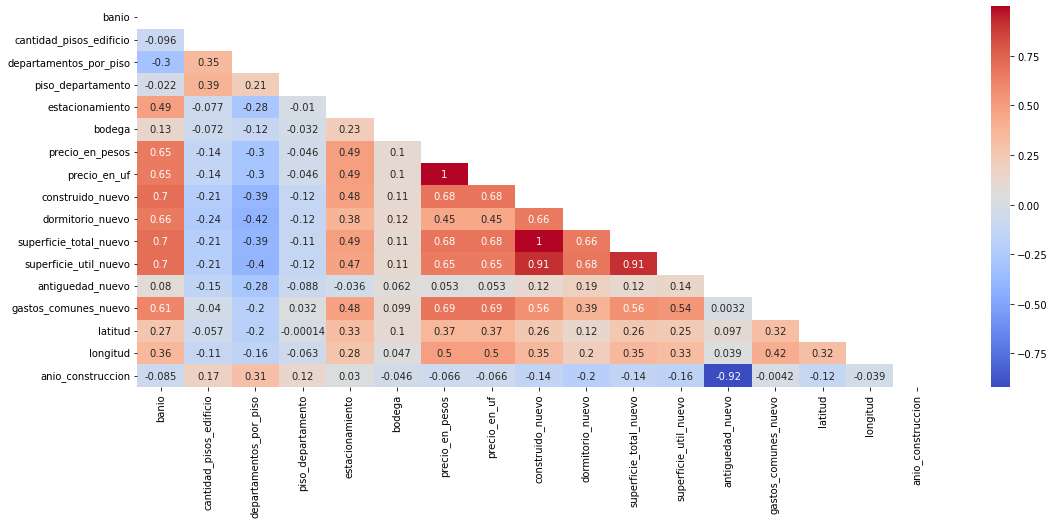

In [179]:
plt.figure(figsize= (18,7))
#sns.heatmap(df.corr(method='kendall'), annot=True, cmap='coolwarm')
correlaciones = df.corr(method='kendall')
upp_mat = np.triu(correlaciones)
sns.heatmap(correlaciones, annot = True, cmap = 'coolwarm', mask = upp_mat)

In [180]:
# Calcular la matriz de correlación de Kendall
corr = df.corr(method='kendall')
#corr

In [181]:
# Obtener los pares de observaciones con mayor correlación
top_corr = corr.unstack().sort_values(ascending=False).drop_duplicates()[:15].reset_index()
top_corr

,level_0,level_1,0
0,banio,banio,1.00
1,precio_en_pesos,precio_en_uf,1.00
2,superficie_total_nuevo,construido_nuevo,1.00
3,superficie_util_nuevo,construido_nuevo,0.91
4,superficie_util_nuevo,superficie_total_nuevo,0.91
5,construido_nuevo,banio,0.70
6,superficie_total_nuevo,banio,0.70
7,superficie_util_nuevo,banio,0.70
8,gastos_comunes_nuevo,precio_en_uf,0.69
9,gastos_comunes_nuevo,precio_en_pesos,0.69


Eliminaremos aquellas columnas que tiene correlaciones muy alta, sobre el 90%, junto con la variable `antiguedad_nuevo`, que fue utilizada para la creación de la variable `anio_construccion` 

In [182]:
df_2 = None
df_2 = df.drop(['precio_en_pesos', 'superficie_util_nuevo', 'construido_nuevo', 'antiguedad_nuevo'], axis=1)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1547 entries, 0 to 1547
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   descripcion              1547 non-null   object 
 1   ubicacion                1547 non-null   object 
 2   banio                    1539 non-null   float64
 3   cantidad_pisos_edificio  1060 non-null   float64
 4   departamentos_por_piso   833 non-null    float64
 5   piso_departamento        1086 non-null   float64
 6   orientacion              921 non-null    object 
 7   estacionamiento          1039 non-null   float64
 8   bodega                   973 non-null    float64
 9   precio_en_uf             1547 non-null   float64
 10  dormitorio_nuevo         1547 non-null   float64
 11  superficie_total_nuevo   1543 non-null   float64
 12  gastos_comunes_nuevo     1378 non-null   float64
 13  latitud                  1547 non-null   float64
 14  longitud                

In [183]:
corr2 = df_2.corr(method='kendall')
top_corr2 = corr2.unstack().sort_values(ascending=False).drop_duplicates()[:15].reset_index()
top_corr2

,level_0,level_1,0
0,banio,banio,1.00
1,banio,superficie_total_nuevo,0.70
2,precio_en_uf,gastos_comunes_nuevo,0.69
3,superficie_total_nuevo,precio_en_uf,0.68
4,superficie_total_nuevo,dormitorio_nuevo,0.66
5,banio,dormitorio_nuevo,0.66
6,banio,precio_en_uf,0.65
7,gastos_comunes_nuevo,banio,0.61
8,gastos_comunes_nuevo,superficie_total_nuevo,0.56
9,longitud,precio_en_uf,0.50


## Imputando datos perdidos

Antes de proceder con la imputación de datos, se modifican ciertas incongruencias presentadas en algunas de las variables.

In [62]:
# calcular los percentiles de la columna "antiguedad_nuevo"
#percentiles = df['antiguedad_nuevo'].quantile([0, 0.1, 0.2, 0.25, 0.5, 0.75, 0.97])
#percentiles

In [63]:
#df.isnull().sum()/df.shape[0]*100
df_2.isnull().sum().sort_values(ascending=False)

departamentos_por_piso     714
orientacion                626
bodega                     574
estacionamiento            508
anio_construccion          506
cantidad_pisos_edificio    487
piso_departamento          461
gastos_comunes_nuevo       169
banio                        8
superficie_total_nuevo       4
descripcion                  0
ubicacion                    0
precio_en_uf                 0
dormitorio_nuevo             0
latitud                      0
longitud                     0
dtype: int64

In [64]:
# Es una función que permite conocer cuales son las variables que tienen valores perdidos
# n = 10 por defecto, muestra los 10 primeros.
# thresh = 80 por defecto, evalua cuantas son las variables que superan el 80% de los valores perdidos
def top_missing_cols(df,n=10,thresh=80):
    """
    returns missing columns in dataframe with missing values percent > thresh
    if n=None. It will gave whole dataframe with missing values percent > thresh
    """
    
    dff = (df.isnull().sum()/df.shape[0])*100
    dff = dff.reset_index()
    dff.columns = ['col','missing_percent']
    dff = dff.sort_values(by=['missing_percent'],ascending=False).reset_index(drop=True)
    print(f'There are {df.isnull().any().sum()} columns in this dataset with missing values.')
    print(f'There are {dff[dff["missing_percent"] > thresh].shape[0]} columns with missing percent values than {thresh}%')
    if n:
        return dff.head(n) # Por defecto top 10
    else:
        return dff # Muestra todas las variables que supera el % de valores perdidos evaluado

In [65]:
#top_missing_cols(train,n=30 ,thresh=85) # mostrar las 30 primeras variables con NA y conocer cuantas son las variables que superen el 85%
top_missing_cols(df_2,n=74, thresh=85) # conocer cuantas son las variables que superen el 85% de valores perdidos

There are 10 columns in this dataset with missing values.
There are 0 columns with missing percent values than 85%


,col,missing_percent
0,departamentos_por_piso,46.15
1,orientacion,40.47
2,bodega,37.10
3,estacionamiento,32.84
4,anio_construccion,32.71
5,cantidad_pisos_edificio,31.48
6,piso_departamento,29.80
7,gastos_comunes_nuevo,10.92
8,banio,0.52
9,superficie_total_nuevo,0.26


In [66]:
!pip install missingno

In [ ]:
#help(msno.bar)

<AxesSubplot:>

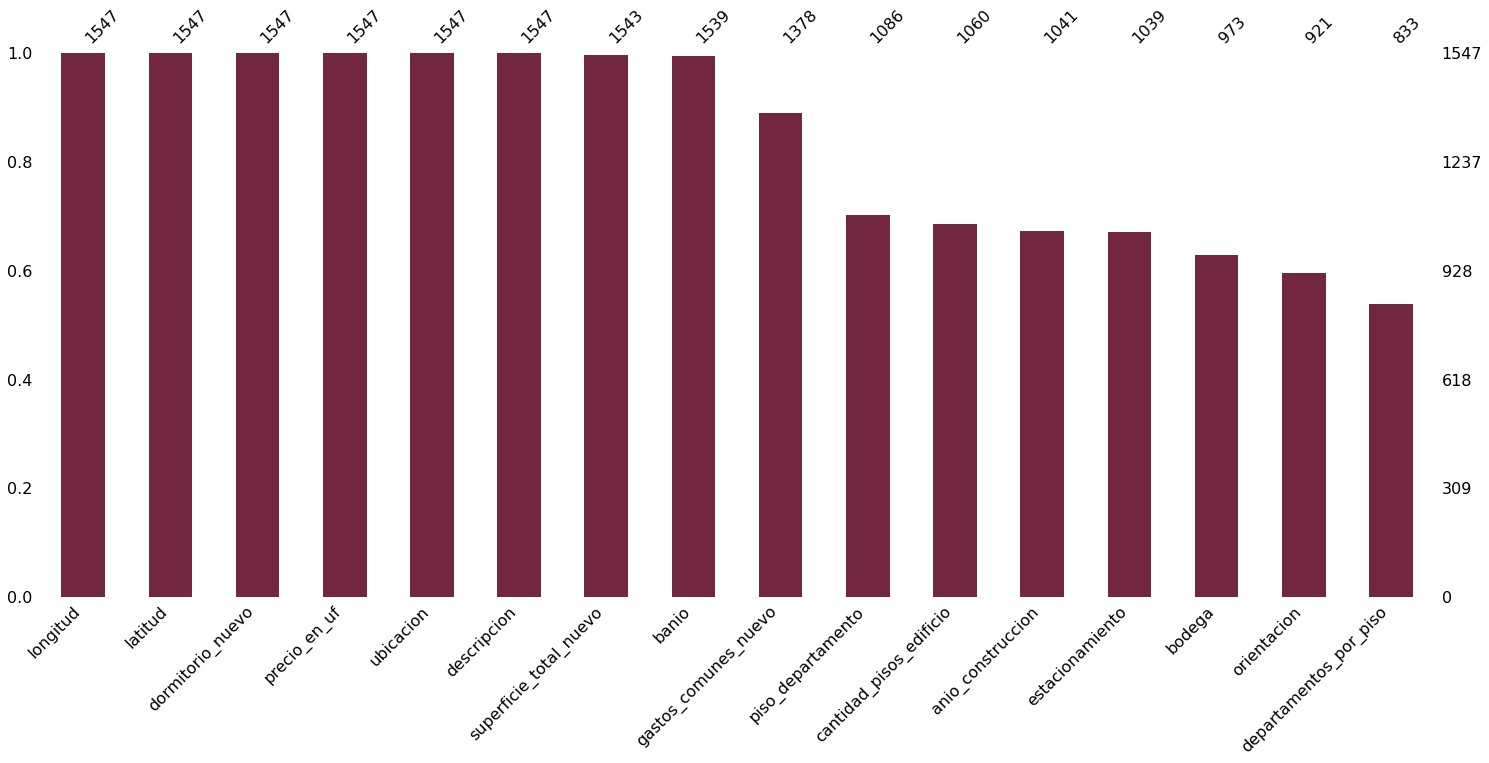

In [67]:
import missingno as msno # librería para tratamiento de datos perdidos

#msno.matrix(df)
msno.bar(df_2, sort= 'descending', color=(0.45, 0.15, 0.25))

In [68]:
# Identificamos los missing values visualmente
#sns.heatmap(df.isnull(), cbar=False)

Se procede a imputar datos perdidos en la base de datos:
departamentos_por_piso, 
orientacion, 
bodega,
estacionamiento,
anio_construccion,
cantidad_pisos_edificio,
piso_departamento,
gastos_comunes_nuevo,
banio,
superficie_total_nuevo

In [69]:
departamentos_por_piso_median = df_2["departamentos_por_piso"].median()
bodega_median = df_2["bodega"].median()
estacionamiento_median = df_2["estacionamiento"].median()
anio_construccion_median = df_2["anio_construccion"].median()
cantidad_pisos_edificio_median = df_2["cantidad_pisos_edificio"].median()
piso_departamento_median = df_2["piso_departamento"].median()
gastos_comunes_nuevo_median = df_2["gastos_comunes_nuevo"].median()
banio_median = df_2["banio"].median()
superficie_total_nuevo_median = df_2["superficie_total_nuevo"].median()
#superficie_util_nuevo_median = df_2["superficie_util_nuevo"].median()
#antiguedad_nuevo_median = df_2['antiguedad_nuevo'].median()

In [70]:
df_2["departamentos_por_piso"].fillna(departamentos_por_piso_median, inplace = True)
df_2["bodega"].fillna(bodega_median, inplace = True)
df_2["estacionamiento"].fillna(estacionamiento_median, inplace = True)
df_2["anio_construccion"].fillna(anio_construccion_median, inplace = True)
df_2["cantidad_pisos_edificio"].fillna(cantidad_pisos_edificio_median, inplace = True)
df_2["piso_departamento"].fillna(piso_departamento_median, inplace = True)
df_2["gastos_comunes_nuevo"].fillna(gastos_comunes_nuevo_median, inplace = True)
df_2["banio"].fillna(banio_median, inplace = True)
df_2["superficie_total_nuevo"].fillna(superficie_total_nuevo_median, inplace = True)
#df_2["superficie_util_nuevo"].fillna(superficie_util_nuevo_median, inplace = True)
#df_2['antiguedad_nuevo'].fillna(anio_construccion_median, inplace=True)

df_2.isnull().sum()

descripcion                  0
ubicacion                    0
banio                        0
cantidad_pisos_edificio      0
departamentos_por_piso       0
piso_departamento            0
orientacion                626
estacionamiento              0
bodega                       0
precio_en_uf                 0
dormitorio_nuevo             0
superficie_total_nuevo       0
gastos_comunes_nuevo         0
latitud                      0
longitud                     0
anio_construccion            0
dtype: int64

In [ ]:
#!pip install missingpy

#Ocupando Random Forest

#from missingpy import MissForest

Observación: otra posibilidad podría ser la imputación utilizando KNN o bien algun otro procedimiento. A continuación se presenta una función para imputar datos 

In [ ]:
# Definimos la función que reemplazará los valores faltantes con un valor específico
#def reemplazar_nulos(columna, valor):
#    return columna.fillna(valor)

# Aplicamos la función a una columna del DataFrame, reemplazando los valores faltantes por 0

#df['estacionamiento'] = df['estacionamiento'].apply(reemplazar_nulos, valor=0)
#df['bodega'] = df['bodega'].apply(reemplazar_nulos, valor=0)

Falta la variable orientación

In [71]:
moda_orientacion = df_2['orientacion'].mode()[0]
moda_orientacion

'O'

La base ya no cuenta con valores perdidos

In [72]:
df_2['orientacion'].fillna(moda_orientacion, inplace=True)
df_2.isnull().sum().sum()

0

In [73]:
df_2.shape 

(1547, 16)

## Valores atípicos

In [74]:
df_2.head(1)

,descripcion,ubicacion,banio,cantidad_pisos_edificio,departamentos_por_piso,piso_departamento,orientacion,estacionamiento,bodega,precio_en_uf,dormitorio_nuevo,superficie_total_nuevo,gastos_comunes_nuevo,latitud,longitud,anio_construccion
0,No deje de visitar... gran departamento u ofic...,"Av. Providencia 1200 - 1500, Providencia, Chil...",2.00,6.00,4.00,6.00,N,1.00,1.00,"5,228.57",4.00,103.00,"45,000.00",-33.43,-70.62,"1,971.00"


In [118]:
X  = df_2[['precio_en_uf', 'superficie_total_nuevo','gastos_comunes_nuevo']] #,'superficie_total_nuevo','gastos_comunes_nuevo'
X.describe()

,precio_en_uf,superficie_total_nuevo,gastos_comunes_nuevo
count,"1,547.00","1,547.00","1,547.00"
mean,"5,881.97",91.89,"100,443.36"
std,"7,774.04",318.39,"98,186.69"
min,0.29,1.00,0.00
25%,"2,595.50",45.40,"50,000.00"
50%,"4,100.00",65.00,"75,000.00"
75%,"7,300.00",94.00,"120,000.00"
max,"200,000.00","11,040.00","1,200,000.00"


In [129]:
import scipy
from scipy import stats
from pyod.models.knn import KNN
#from pyod.models.lof import LOF
#from pyod.models.abod import ABOD

clf = KNN(contamination = 0.10, metric = "manhattan") 
clf.fit(X)
y_pred = clf.predict(X)
outliers_df = X[y_pred == 1]
outliers_df.sort_values(by= ['precio_en_uf'], ascending=False)
#print(outliers_df)
#print('Cantidad de Observaciones: ',len(outliers_df.sort_values()))

,precio_en_uf,superficie_total_nuevo,gastos_comunes_nuevo
1251,"200,000.00",57.00,"200,000.00"
473,"123,123.00",123.00,"1,231.00"
1105,"100,000.00",100.00,"500,000.00"
1320,"39,000.00",400.00,"500,000.00"
1009,"37,000.00",490.00,"1,200,000.00"
...,...,...,...
600,"5,000.00",90.00,"135,000.00"
1094,"4,500.00",72.07,"105,000.00"
1329,"3,700.00",74.30,"105,000.00"
1006,"3,625.00","5,328.00","70,000.00"


In [130]:
outliers_df.describe()

,precio_en_uf,superficie_total_nuevo,gastos_comunes_nuevo
count,131.00,131.00,131.00
mean,"17,271.43",305.60,"276,221.56"
std,"21,604.56","1,051.24","217,200.60"
min,"2,632.00",11.00,0.00
25%,"8,995.00",116.00,"145,000.00"
50%,"12,490.00",156.00,"240,000.00"
75%,"17,320.00",235.39,"335,000.00"
max,"200,000.00","11,040.00","1,200,000.00"


In [131]:
outliers_df.columns

Index(['precio_en_uf', 'superficie_total_nuevo', 'gastos_comunes_nuevo'], dtype='object')

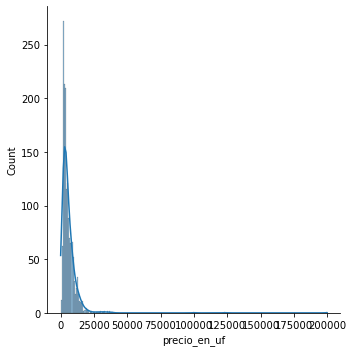

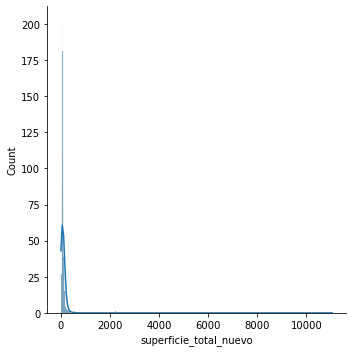

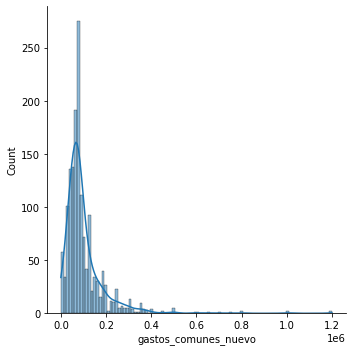

In [132]:
for col in outliers_df.columns:
    sns.displot(x=df_2[col],kind=("hist"), kde=True)

Los boxplot de las variables `precio_en_uf`, `superficie_total_nuevo`, `gastos_comunes_nuevo` presentan la siguiente información

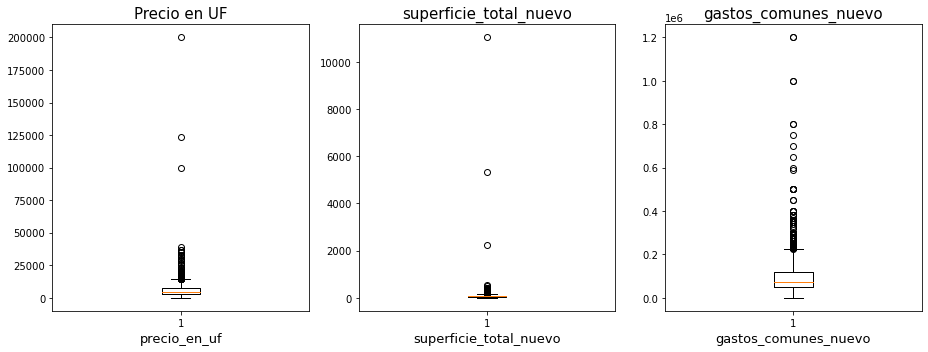

In [133]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13,5))

ax1.boxplot(df_2['precio_en_uf'])
ax1.set_xlabel("precio_en_uf", fontsize = 13)
ax1.set_ylabel("", fontsize = 13)
ax1.set_title(r"Precio en UF", fontsize=15)

ax2.boxplot(df_2['superficie_total_nuevo'])
ax2.set_xlabel("superficie_total_nuevo", fontsize = 13)
ax2.set_ylabel("", fontsize = 13)
ax2.set_title(r"superficie_total_nuevo", fontsize=15)

ax3.boxplot(df_2['gastos_comunes_nuevo'])
ax3.set_xlabel("gastos_comunes_nuevo", fontsize = 13)
ax3.set_ylabel("", fontsize = 13)
ax3.set_title(r"gastos_comunes_nuevo", fontsize=15)
plt.tight_layout()

In [134]:
lista_indices = outliers_df.index
lista_indices

Int64Index([  10,   33,   35,   36,   38,   45,   63,   72,   86,   92,
            ...
            1451, 1456, 1468, 1486, 1513, 1523, 1531, 1533, 1539, 1547],
           dtype='int64', length=131)

In [150]:
df_sin_outliers = None
df_sin_outliers = df_2.copy()
df_sin_outliers.drop(lista_indices, axis=0, inplace=True)
df_sin_outliers.shape

(1416, 16)

Al observar la distribución de los datos con y sin outliers, se presenta. 

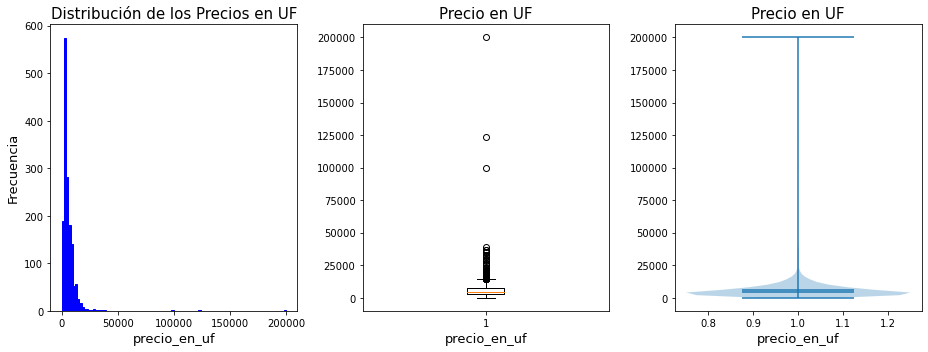

In [152]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13,5))

ax1.hist(df['precio_en_uf'], bins=100, color = "blue", ec="blue", histtype="bar")
ax1.set_xlabel("precio_en_uf", fontsize = 13)
ax1.set_ylabel("Frecuencia", fontsize = 13)
ax1.set_title(r"Distribución de los Precios en UF", fontsize=15)

ax2.boxplot(df['precio_en_uf'])
ax2.set_xlabel("precio_en_uf", fontsize = 13)
ax2.set_ylabel("", fontsize = 13)
ax2.set_title(r"Precio en UF", fontsize=15)

ax3.violinplot(df['precio_en_uf'], showmeans = True, showmedians = True)
ax3.set_xlabel("precio_en_uf", fontsize = 13)
ax3.set_ylabel("", fontsize = 13)
ax3.set_title(r"Precio en UF", fontsize=15)

plt.tight_layout()

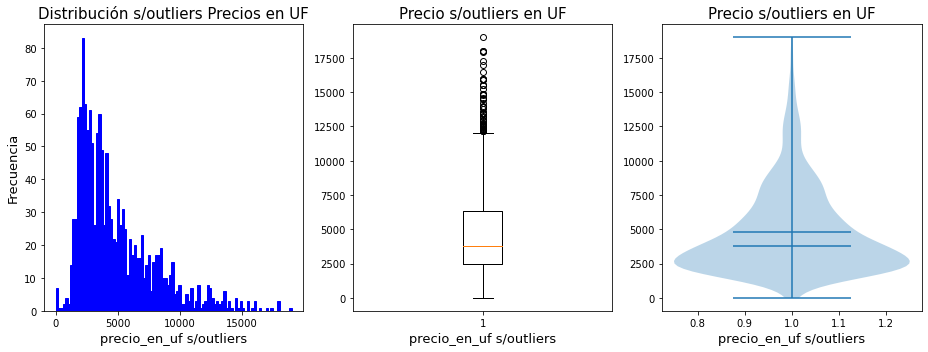

In [154]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13,5))

ax1.hist(df_sin_outliers['precio_en_uf'], bins=100, color = "blue", ec="blue", histtype="bar")
ax1.set_xlabel("precio_en_uf s/outliers", fontsize = 13)
ax1.set_ylabel("Frecuencia", fontsize = 13)
ax1.set_title(r"Distribución s/outliers Precios en UF", fontsize=15)

ax2.boxplot(df_sin_outliers['precio_en_uf'])
ax2.set_xlabel("precio_en_uf s/outliers", fontsize = 13)
ax2.set_ylabel("", fontsize = 13)
ax2.set_title(r"Precio s/outliers en UF", fontsize=15)

ax3.violinplot(df_sin_outliers['precio_en_uf'], showmeans = True, showmedians = True)
ax3.set_xlabel("precio_en_uf s/outliers", fontsize = 13)
ax3.set_ylabel("", fontsize = 13)
ax3.set_title(r"Precio s/outliers en UF", fontsize=15)
plt.tight_layout()

Luego de eliminar los valores atipicos de la variables `precio_en_uf`, se tiene una distribución asimétrica, pero más atenuada respecto a los datos originales.

In [140]:
#sns.displot(x=df_sin_outliers['precio_en_uf'], kind=("hist"), kde=True)

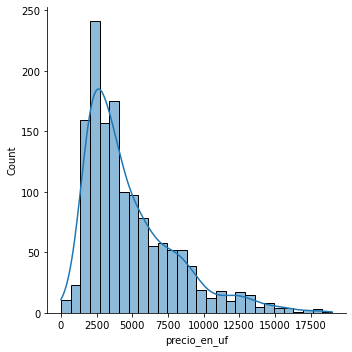

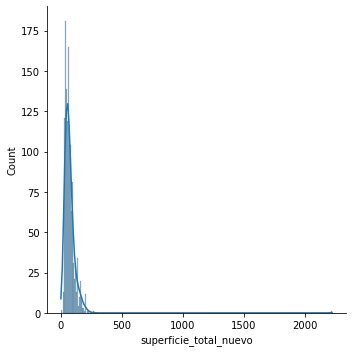

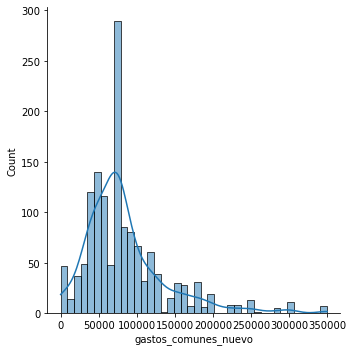

In [155]:
for col in outliers_df.columns:
    sns.displot(x=df_sin_outliers[col],kind=("hist"), kde=True)

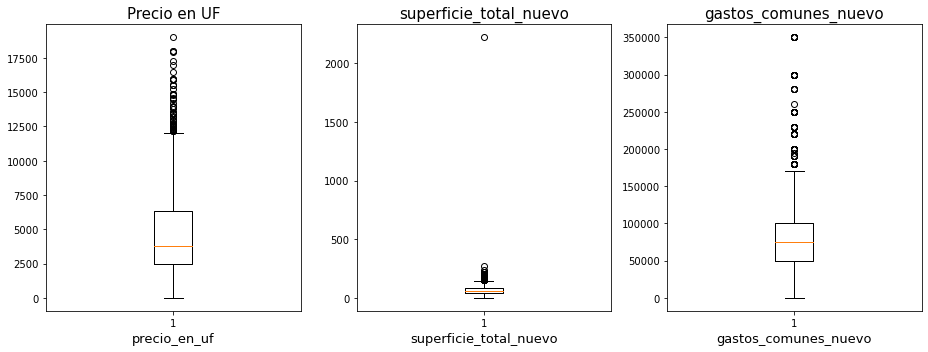

In [156]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13,5))

ax1.boxplot(df_sin_outliers['precio_en_uf'])
ax1.set_xlabel("precio_en_uf", fontsize = 13)
ax1.set_ylabel("", fontsize = 13)
ax1.set_title(r"Precio en UF", fontsize=15)

ax2.boxplot(df_sin_outliers['superficie_total_nuevo'])
ax2.set_xlabel("superficie_total_nuevo", fontsize = 13)
ax2.set_ylabel("", fontsize = 13)
ax2.set_title(r"superficie_total_nuevo", fontsize=15)

ax3.boxplot(df_sin_outliers['gastos_comunes_nuevo'])
ax3.set_xlabel("gastos_comunes_nuevo", fontsize = 13)
ax3.set_ylabel("", fontsize = 13)
ax3.set_title(r"gastos_comunes_nuevo", fontsize=15)
plt.tight_layout()

In [157]:
df_sin_outliers['superficie_total_nuevo'].max()

2222.0

In [158]:
df_sin_outliers[df_sin_outliers['superficie_total_nuevo'] == df_sin_outliers['superficie_total_nuevo'].max()]

,descripcion,ubicacion,banio,cantidad_pisos_edificio,departamentos_por_piso,piso_departamento,orientacion,estacionamiento,bodega,precio_en_uf,dormitorio_nuevo,superficie_total_nuevo,gastos_comunes_nuevo,latitud,longitud,anio_construccion
604,El vendedor no incluyó una descripción del inm...,"Camino Del Monte 6150, La Florida, Chile, Lo C...",1.00,12.00,5.00,6.00,O,1.00,1.00,"9,999.00",1.00,"2,222.00","75,000.00",-33.51,-70.53,"2,011.00"


In [159]:
df_sin_outliers.drop(index=[604], axis=0, inplace=True)
df_sin_outliers.shape

(1415, 16)

## Ingeniería de variables

### Creando la variable para identificar, de la variable descripcion, si hay o no loggia (lo mismo con la variable piscina, quincho, comedor y cercania al metro).

In [184]:
# Definimos la función para buscar la palabra en una frase, y asignar 1 o 0 segun corresponda
def buscar_palabra(frase, palabra):
    if palabra in frase:
        return 'Si'
    else:
        return 'No'

In [185]:
df_final = None
df_final = df_sin_outliers.copy()
df_final.shape

(1415, 16)

In [186]:
# Aplicamos la función a la columna 'Frase' del DataFrame usando el método apply()
#df['tiene_banio'] = df['descripcion'].apply(lambda x: buscar_palabra(x, 'baño'))

df_final['loggia']=df_final['descripcion'].apply(lambda x: buscar_palabra(x, 'loggia'))
df_final['piscina']=df_final['descripcion'].apply(lambda x: buscar_palabra(x, 'piscina'))
df_final['quincho']=df_final['descripcion'].apply(lambda x: buscar_palabra(x, 'quincho'))
df_final['comedor']=df_final['descripcion'].apply(lambda x: buscar_palabra(x, 'comedor',))
df_final['metro']=df_final['descripcion'].apply(lambda x: buscar_palabra(x, 'metro'))

In [ ]:
# con este codigo se identifica si existe alguna inconsistencia de la descricpcion con la existencia de baño
#df[(df['banio'] == 0) & (df['tiene_banio'] != 0)]

In [ ]:
#borrando columnas

#df = df.drop('tiene_loggia', axis=1)

In [187]:
df_final['loggia'].value_counts('%')*100

No   94.20
Si    5.80
Name: loggia, dtype: float64

In [188]:
df_final['piscina'].value_counts('%')*100

No   67.99
Si   32.01
Name: piscina, dtype: float64

In [189]:
df_final['quincho'].value_counts('%')*100

No   76.47
Si   23.53
Name: quincho, dtype: float64

In [190]:
df_final['comedor'].value_counts('%')*100

No   56.47
Si   43.53
Name: comedor, dtype: float64

In [191]:
df_final['metro'].value_counts('%')*100

No   55.48
Si   44.52
Name: metro, dtype: float64

In [193]:
# para leer las descripciones que contienen la palabra metro.
df_final[df_final['metro'] =='Si']['descripcion'].tolist() 

['No deje de visitar... gran departamento u oficina en pleno Providencia, amplio, luminoso y bien ubicado.Es un clásico de Providencia,  sólido de hormigón con muros altos, grandes espacios cómodos y vista al San Cristóbal. Hall de acceso que distribuye a la cocina con espacios para adecuar a sus necesidades y al living-comedor que mira al Norte,  para que disfrute el sol con la familia, dormitorio principal  y de visitas también norte, dormitorio familiar muy grande, todos con closet y acceso al baño principal completo, mas home office o dormitorio de servicio. El departamento permite uso comercial, actualmente se usa como oficina con patente comercial.Excelente ubicación, al lado de bancos, supermercados, cerca de colegios, universidades, restaurantes de toda índole, y al mismo tiempo en lugar seguro, al lado metro Manuel Montt.Edificio seguro, con conserjería, ascensor, gastos comunes aprox $45.000. con estacionamientos que se asignan según lista de interesados. Fono 9 9509 6107',
 

In [194]:
# list( train.select_dtypes( include= 'integer') )  # Comando base
print( 'Columnas Object' )
print( wrapper.fill( str( list( df_final.select_dtypes( include= 'object') ) ) ) )
print( 'Columnas Entero' )
print( wrapper.fill( str( list( df_final.select_dtypes( include= 'integer') ) ) ) )
print( 'Columnas Float' )
print( wrapper.fill( str( list( df_final.select_dtypes( include= 'floating') ) ) ) )
print( 'Columnas Verdadero Falso' )
print( wrapper.fill( str( list( df_final.select_dtypes( include= 'bool') ) ) ) )
print( 'Columnas Categoricas' )
print( wrapper.fill( str( list( df_final.select_dtypes( include= 'category') ) ) ) )
print( 'Columnas Fecha' )
print( wrapper.fill( str( list( df_final.select_dtypes( include= 'datetime') ) ) ) )

Columnas Object
['descripcion', 'ubicacion', 'orientacion', 'loggia', 'piscina', 'quincho', 'comedor', 'metro']
Columnas Entero
[]
Columnas Float
['banio', 'cantidad_pisos_edificio', 'departamentos_por_piso', 'piso_departamento',
'estacionamiento', 'bodega', 'precio_en_uf', 'dormitorio_nuevo', 'superficie_total_nuevo',
'gastos_comunes_nuevo', 'latitud', 'longitud', 'anio_construccion']
Columnas Verdadero Falso
[]
Columnas Categoricas
[]
Columnas Fecha
[]


In [195]:
df_final.head()

,descripcion,ubicacion,banio,cantidad_pisos_edificio,departamentos_por_piso,piso_departamento,orientacion,estacionamiento,bodega,precio_en_uf,...,superficie_total_nuevo,gastos_comunes_nuevo,latitud,longitud,anio_construccion,loggia,piscina,quincho,comedor,metro
0,No deje de visitar... gran departamento u ofic...,"Av. Providencia 1200 - 1500, Providencia, Chil...",2.00,6.00,4.00,6.00,N,1.00,1.00,"5,228.57",...,103.00,"45,000.00",-33.43,-70.62,"1,971.00",No,No,No,Si,Si
1,Excelente departamento en Av. El Llano Suberca...,"Llano Subercaseaux, San Miguel, Chile, El Llan...",2.00,21.00,4.00,19.00,S,1.00,1.00,"5,290.00",...,90.00,"90,000.00",-33.49,-70.65,"2,011.00",No,Si,Si,No,Si
2,Este exquisito departamento está prácticamente...,"Estoril 750, Las Condes, Chile, Estoril, Las C...",2.00,1.00,4.00,1.00,S,2.00,1.00,"17,300.00",...,238.00,"350,000.00",-33.39,-70.53,"2,019.00",No,Si,No,Si,Si
3,"Excelente ubicación, calle Román Díaz a pasos ...","Román Díaz, Providencia, Chile, Manuel Montt, ...",2.00,12.00,5.00,6.00,NP,1.00,1.00,"7,950.00",...,99.36,"120,000.00",-33.43,-70.62,"2,007.00",No,No,No,No,No
4,Se vende hermoso departamento en comuna de Ñuñ...,"Francisco De Villagra 77, Ñuñoa, Chile, Plaza ...",2.00,24.00,8.00,1.00,N,1.00,1.00,"4,800.00",...,75.00,"84,000.00",-33.45,-70.58,"2,006.00",No,No,No,No,Si


#### Ya con la data completa, guardaremos el conjunto de datos ya limpios. Si bien, los datos se pueden guardar en diferentes extensiones, es recomendable guardarlos como objetos.


In [196]:
import pickle

pd.to_pickle(df_final, '../data_clean/data_limpia.pkl')

#Leer datos
#data = pd.read_pickle('data_limpia.pkl')

Una acción que no se exploró en esta primera etapa, es la posibilidad de discretizar algunas de las variables tipo float.

In [ ]:
# Calcular los deciles de la columna
deciles = df_2['superficie_util_nuevo'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

# Función para discretizar los valores en deciles
def discretizar(valor):
    for i in range(len(deciles)):
        if valor <= deciles[i]:
            return i
    return len(deciles)

# Agregar una nueva columna al dataframe con los valores discretizados
df_2['deciles_superficie_util'] = df_2['superficie_util_nuevo'].apply(discretizar)

In [ ]:
df_2.groupby('superficie_util_nuevo')

In [ ]:
sns.pairplot(df_2['superficie_util_nuevo'])